# Salary Prediction with Non-linear Data 

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
dataset = pd.read_csv('PositionSalaries_Data.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [49]:
# view the dimensions of dataset
dataset.shape

(10, 3)

In [50]:
# view summary of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


We have the two independent variables namely, Position and Level. There is one independent variable i.e., Salary. 

So, in this problem we begin with a Linear Regression model  to understand the correlation between the Level and Salary of the employee data in the company and e to predict the salary for the new employee. We use the entire data for training the model as we have only few data points.

## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [52]:
pred = lin_reg.predict(X)

In [53]:
print("mae=",mean_absolute_error(y,pred))

mae= 128454.54545454546


In [54]:
print('mse=', metrics.mean_squared_error(y,pred))

mse= 26695878787.878784


In [55]:
print('rmse=', np.sqrt(metrics.mean_squared_error(y,pred)))

rmse= 163388.73519272613


In [56]:
print('R2 Square=',metrics.r2_score(y,pred))

R2 Square= 0.6690412331929895


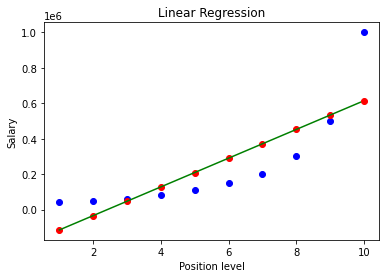

In [57]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.scatter(X, pred, color = 'red')
plt.plot(X_grid, lin_reg.predict(X_grid), color = 'green')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Polynomial Regression

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [59]:
y_pred = lin_reg.predict(X_poly)

In [60]:
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,45000,53356.643357
1,50000,31759.906760
2,60000,58642.191142
3,80000,94632.867133
4,110000,121724.941725
5,150000,143275.058275
6,200000,184003.496504
7,300000,289994.172494
8,500000,528694.638695
9,1000000,988916.083916


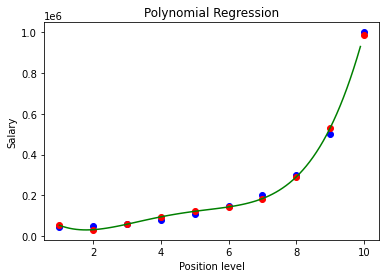

In [61]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.scatter(X, y_pred, color = 'red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [62]:
print("mae=",mean_absolute_error(y,y_pred))

mae= 12681.818181828345


In [63]:
print('mse=', metrics.mean_squared_error(y,y_pred))

mse= 210343822.84381992


In [64]:
print('rmse=', np.sqrt(metrics.mean_squared_error(y,y_pred)))

rmse= 14503.234909626883


# Choosing the Degree of the Polynomial

In [40]:
# Reading the file curve.csv and printing first five rows
curve = pd.read_csv( "curve.csv" )
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


In [36]:
# view the dimensions of dataset
curve.shape

(50, 3)

In [37]:
# view summary of dataset
curve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     int64  
 1   y       50 non-null     float64
 2   fit     50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


Text(0, 0.5, 'y values')

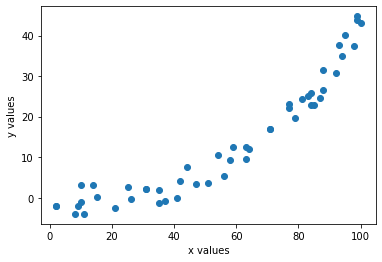

In [19]:
plt.scatter( curve.x, curve.y );
plt.xlabel("x values")
plt.ylabel("y values")

In [20]:
# Input: degree of the polynomial used in the model
def fit_poly(degree):
    # calling numpy method polyfit
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    # draw the regression line after fitting the model
    sn.regplot( curve.x, curve.y, fit_reg = False )
    # Plot the actual x and y values
    return plt.plot( curve.x, curve.fit, label='fit' )

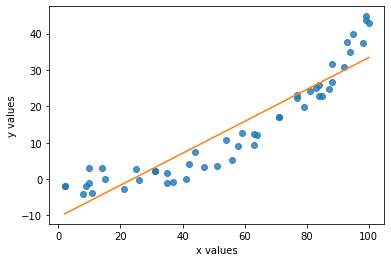

In [67]:
fit_poly(1);
## Plotting the model form and the data
plt.xlabel("x values")
plt.ylabel("y values");

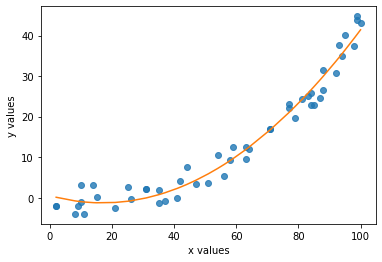

In [68]:
fit_poly(2);
plt.xlabel("x values")
plt.ylabel("y values");

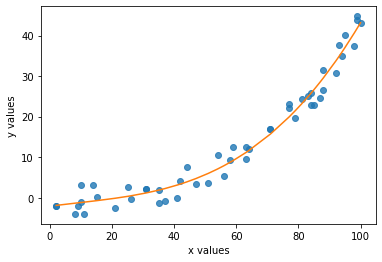

In [73]:
fit_poly(3);
plt.xlabel("x values")
plt.ylabel("y values");

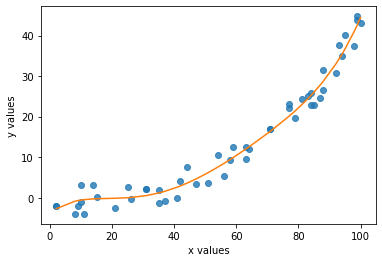

In [74]:
fit_poly(5);
plt.xlabel("x values")
plt.ylabel("y values");

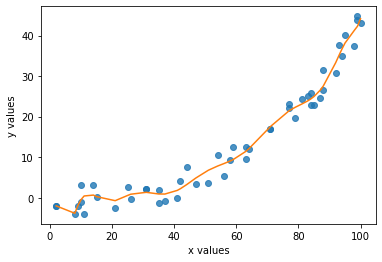

In [78]:
fit_poly(15);
plt.xlabel("x values")
plt.ylabel("y values");

In [69]:
from sklearn.model_selection import train_test_split
# Split the dataset into 80:20 split into training and test set
train_X, test_X, train_y, test_y = train_test_split( curve.x,
curve.y,
test_size = 0.20,
random_state = 100 )
# Define the dataframe store degree and rmse for training and test set
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )
# Define a method to return the rmse given actual and predicted values.
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )
# Iterate from degree 1 to 20
for i in range( 1, 20 ):
    # fitting model
    p = np.polyfit( train_X, train_y, deg = i )
    # storing model degree and rmse on train and test set
    rmse_df.loc[i-1] = [ i,
        get_rmse( train_y, np.polyval( p, train_X ) ),
        get_rmse( test_y, np.polyval( p, test_X ) ) ]

In [70]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,5.325145,5.895678
1,2.0,2.486866,2.731268
2,3.0,2.323157,2.474588
3,4.0,2.319333,2.457077
4,5.0,2.225045,2.432981
5,6.0,2.174390,2.654974
6,7.0,2.168066,2.568840
7,8.0,2.165488,2.643221
8,9.0,2.095012,2.546294
9,10.0,2.094889,2.546696


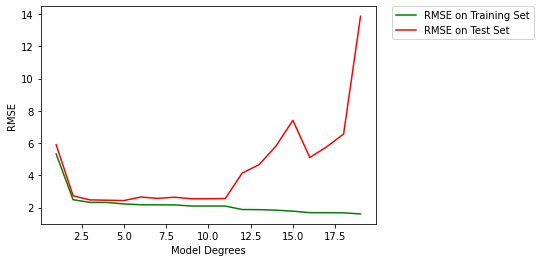

In [77]:
# plotting the rmse for training set in green color
plt.plot( rmse_df.degree,rmse_df.rmse_train,
label='RMSE on Training Set',color = 'g' )
# plotting the rmse for test set in red color
plt.plot( rmse_df.degree,rmse_df.rmse_test,
label='RMSE on Test Set',color = 'r' )
# Mention the legend
plt.legend(bbox_to_anchor=(1.05, 1),loc=2,
borderaxespad=0.);
plt.xlabel("Model Degrees")
plt.ylabel("RMSE");